# Model training

On this notebook we will train a Linear regressor with two differents training models:

* Utilizing a equation to minimize the cost function;

* Utilizing a DG to minimize the cost function;

After this, we will do a polynomial regressor, this model has more parameters than Linear Regression it is more prone to overfitting the training data, so we will see how to detect whether this happens or not, using learning curves, and then we will cover regularization techniques that can reduce the risk of overfitting in the ensemble.
juste in the ensemble.

In the end of notebook we will study the Logistic and Softmax regressors.

In [8]:
import numpy as np
np.random.seed(42)

## Linear Regression Model

Usally, a linear model do a prevision calculating a input attributes pondered sum, plus a constant called *polarization term*.

$\hat{y}$ = $\theta_{0}$ + $\theta_{1}x_{1}$ + $\theta_{2}x_{2}$ + ... + $\theta_{n}x_{n}$

* $\hat{y}$ is the expected value;

* n is the number of features;

* $x_{i}$ is the value of i-th feature;

* $\theta_{j}$ is the parammeter of j model;

Translating this equation for a vetorial form:

$\hat{y}$ = h$_{0}$($\textbf{x}$) = $\theta^{T} \cdot \textbf{x}$.

We can call h$_{0}$($\textbf{x}$) for *hypotesis function of x*.

For training our model we first need a good measurement to how well the model will fit the training data, for this, we can use MSE or RMSE, no difference for this application because if we minimize a function, we also minimize its root (and vice versa).

MSE($\textbf{X}, h_{\theta}$) = $\frac{1}{m}$ $\sum_{i = 1} ^{m} (\theta^{T} \textbf{x}^{(i)} - y^{(i)})^2$.

Obs.: to simplificate I will write MSE($\theta$) instead MSE($\textbf{X}, h_{\theta}$).

### Least Square method

To find the value of θ that minimizes the cost function, there exists a closed-form solution in other words, a mathematical equation that gives the result directly. This is called the Least Squares Method. 

$\hat{\theta} = (\textbf{X}^{T} \cdot \textbf{X})^{-1} \cdot \textbf{X}^{T} \cdot \textbf{y}$

let visualize this with a experiment:

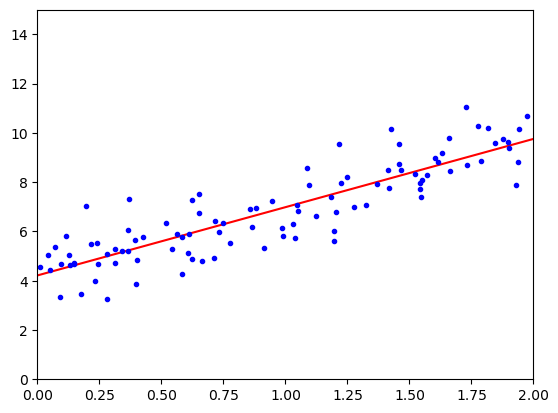

[[4.21509616]
 [2.77011339]]


In [9]:
# Using Numpy:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# utilizing the LSM to minimizate the theta

X_b = np.c_[np.ones((100,1)), X] # ading X0 = 1 to wich instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # adiciona x0 = 1 a cada instância
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])

plt.show()
print(theta_best)

On the positive side, this equation is linear with respect to the number of instances
in the training set (it is O(m)), so it handles large training sets efficiently, as long as they can fit in memory.
training sets, as long as they can fit in memory.
Furthermore, when training your Linear Regression model (using the Least Squares
method or any other algorithm), your predictions become very fast: the computational
computational complexity is linear with respect to the number of instances where you
you want to predict and the number of features. In other words, making
twice as many instances (or twice as many features) will take approximately twice as long.
twice as long.


### Descending Gradient

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal optimal solutions to a wide range of problems. The general idea of Gradient Descent is to iteratively adjust the parameters to minimize a cost function.

Concretely, you start by filling θ with random values (this is called random initialization), and then gradually improve it, taking one small step at a time, each step trying to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum.

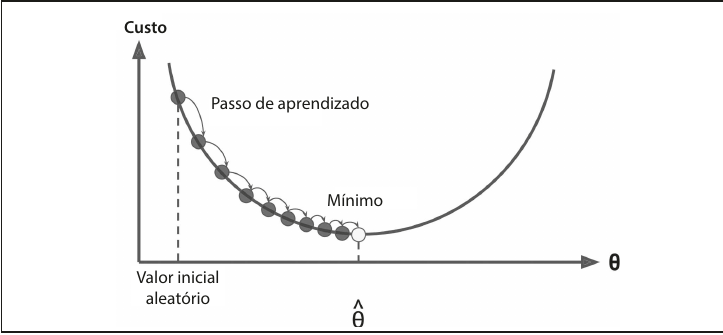

Step size is an important parameter of the Gradient Descent, determined by the *learning rate* hyperparameter. If the learning rate is too small, the algorithm will have to go through many iterations to converge, on the other hand, if the learning rate is too high, you can cross the valley and end up on the other side, possibly even higher than before. This can make the algorithm divergent with higher and higher values, not finding a good solution.

Here two graphs, the first one shows a DG with a to low learning rate, and the second one shows a DG with a to big learning rate:

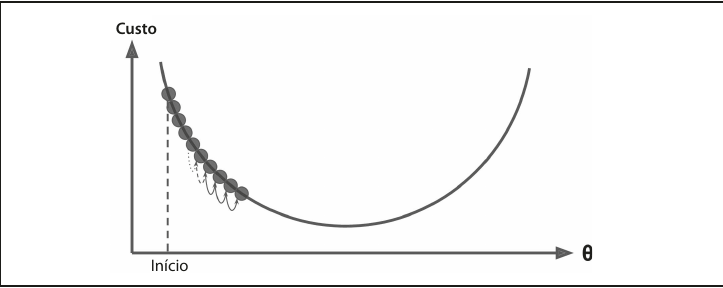

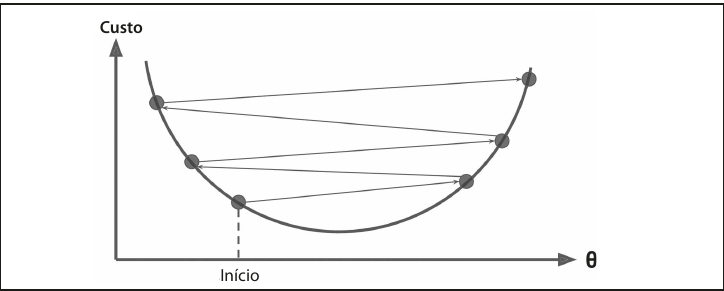

Using Descendent Gradient we have 2 big challenges:

* Our gradient can find a local minimium of the function and ignore a global minimum;

* Our gradient can find a plateau and the evolution of gradient is significatly slowed by this estabilization;

 The MSE cost function for a Linear Regression model is a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses it. This implies that there are no local minima, only a global minimum. It is also a continuous function with a slope that never changes abruptly. 4 These two facts generate a very good consequence: the Gradient Descent is guaranteed to arbitrarily approach the global minimum global minimum (if you wait long enough and if the learning rate is not too high).
 
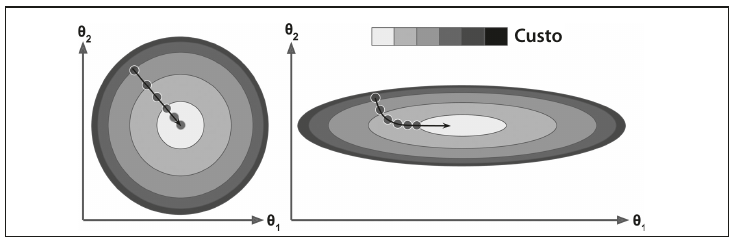

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (with respect to the training set). It is a search in the parameter space of the model: the more parameters a model has, the more dimensions this space has, and the more difficult the search will be: looking for a needle in a 300-dimensional haystack is much more complicated than in three dimensions. Fortunately, as in the case of Linear Regression the cost function is convex, the needle is simply at the bottom of the bowl.

To better ilustrate the model training:

![](gd.gif)

### Batch Gradient Descending


To implement the descending gradient we first need to calculate the gradient of the cost function adopted for training the model.

$\frac{\partial }{\partial \theta_{j}} MSE(\theta)$ = $\frac{2}{m} \sum_{i = 1}^{m} (\theta^{T} \cdot \mathbf{x}^{(i)} - y^{(i)})x_{j}^{(i)}$

We can write this equation using another notation:

$\nabla_{\theta}MSE(\theta)$ = $ \begin{bmatrix}
    \frac{\partial }{\partial \theta_{0}} MSE(\theta)\\
    \frac{\partial }{\partial \theta_{1}} MSE(\theta) \\
    \vdots \\
    \frac{\partial }{\partial \theta_{n}} MSE(\theta)
\end{bmatrix} $ = $\frac{2}{m}\mathbf{X}^{T} \cdot (\mathbf{X} \cdot \theta - \mathbf{y})$


Applying this equation to the system, we fall into a numerical methods problem to determine the solution of the following polynomial:

$\theta^{(i+1)}$ = $\theta_{(i)} - \eta \nabla_{\theta_{i}}MSE(\theta_{(i)})$

Where $\theta_{(i)}$ is the actual value of $\theta$ and $\eta$ is the learning rate.

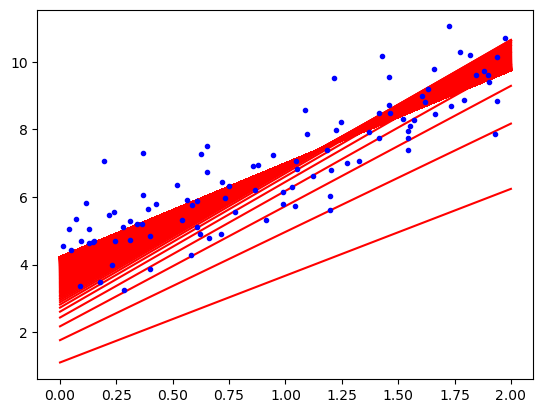

In [10]:
eta = 0.1
loop = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

# Applying the descendent gradient method:
for i in range(loop):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)

    plt.plot(X_new, y_predict, "r-")
    
plt.plot(X, y, "b.")
plt.show()

Through what was found using decending gradients it was possible to regress a straight line very close (if not identical) to the model using least squares. 
Above all, it is important to emphasize the importance of a good learning rate:

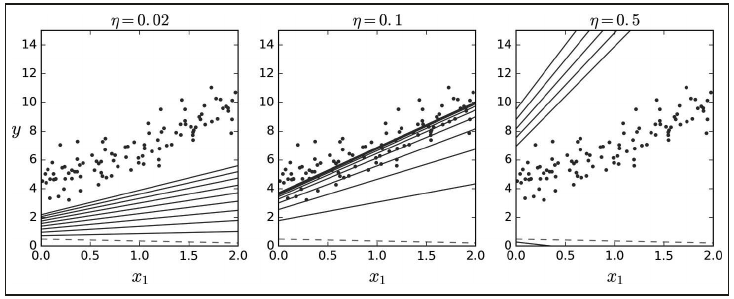

The learning rate on the left is too low: the algorithm will eventually reach the
solution, but it will take a long time. In the middle, the learning rate looks very good: with
only a few iterations it has already converged to the solution. On the right, the learning rate
rate is too high: the algorithm diverges, jumping all over the place and in fact getting
further and further away from the solution.

A silly solution is simply apply the grid search and find the best learning rate, but this is to much computationally expesive.

>>When the cost function is convex and its slope does not change abruptly (as
MSE cost function), the Batch Gradient Descent with a fixed learning rate will
learning rate will converge to the optimal solution, but you may have to wait a bit
a while: it may take O(1/ε) iterations to reach the best within a range of ε
depending on the shape of the cost function. If you divide the tolerance by 10 to get
a more accurate solution, the algorithm will have to run about 10 times as long.



### Stochastic Descending Gradient (SDG)

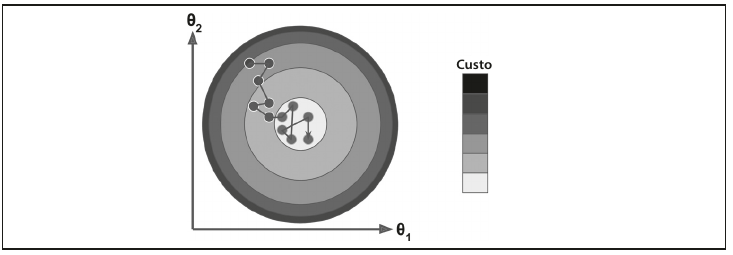

The main problem with the Batch Gradient Descent is the fact that it uses
the entire training set to compute gradients at each step, which makes it very slow when the
very slow when the set is large. At the opposite extreme, Stochastic Gradient Descent
Stochastically Descending Gradient (SGD) chooses a random instance from the training set at each
step and computes gradients based on just this single instance. Obviously, this
makes the algorithm much faster, since it has little data to manipulate in each iteration.
iteration. It also allows you to train on large training sets, since
only one instance needs to be in memory at each iteration.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is
much less regular than the Batch Gradient Descending: instead of decreasing continuously until
instead of decreasing continuously until it reaches the minimum, the cost function will go up and down, decreasing only
average. Over time, it will end up very close to the minimum, but when it gets there,
it will continue to bounce, never stabilizing.so when the
algorithm stops, the final parameter values will be good, but not optimal.

>> When the cost function is very irregular, this can actually
help the algorithm jump outside the local minimum, so that the Stochastic Descending Gradient
Stochastic Gradient Descending will have a better chance of finding the global minimum than the Batch Gradient
Batch Descending Gradient.

In this way, randomness is good for escaping the local optimum, but bad because it means
the algorithm can never settle on the minimum. One solution to this dilemma is to
to gradually reduce the learning rate. The steps start out large (which helps to
make rapid progress and escape local minima) and then slow down, allowing the
the algorithm to settle on the global minimum. This process is called simulated
because it resembles the annealing process in metallurgy in that the molten metal is cooled slowly.
is cooled slowly. The function that determines the learning rate at each
iteration is called the *learning schedule*. If the learning rate is reduced
you can get stuck at a local minimum, or even end up frozen halfway to the minimum.
halfway to the minimum. If the learning rate is reduced slowly, you can
bounce around the minimum for a long period of time and end up with an insufficient solution if you
insufficient if you stop training too soon.

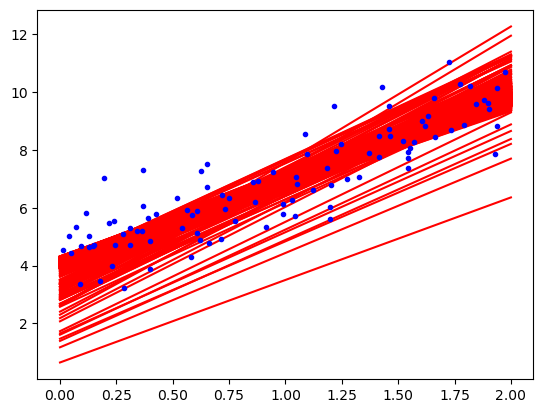

In [11]:
epochs = 50
t0, t1 = 5, 50 # hiperparametters of learning

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random  initialization

for i in range(epochs):
    for j in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(i*m + j)
        
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)

        plt.plot(X_new, y_predict, "r-")
        

plt.plot(X, y, "b.")
plt.show()

Note the big difference in the batch Descending Gradient plot for SGD. This great uncertainty (represented by the family of straight lines around the optimal solution) is characteristic of SGD, ratifying what was said about its main burden: it will never reach the minimum point of the function.

Now, the same experiment, but using Scikit-learn:

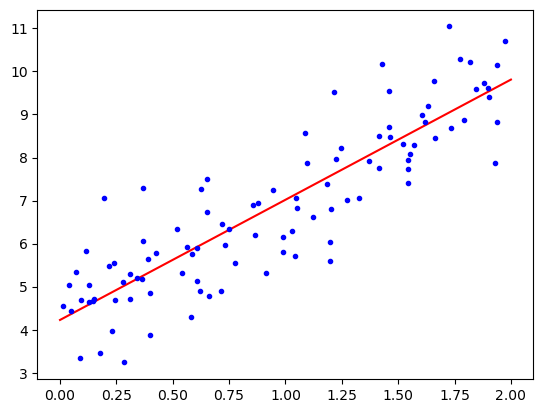

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=1e-05)

sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

theta = [sgd_reg.intercept_, sgd_reg.coef_]

y_predict = X_new_b.dot(theta)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

From this point on we will call the batch gradient decedent BGD.

### Mini Batchs Gradient Descendent

Intuitively we can imagine what **MBGD** (Mini Batches Gradient Descendent) is for, given the context of BGD and SGD.  The main advantage of
of MBGD over SGD is that you can get a performance
performance in hardware optimization of matrix operations, especially when
GPUs are used.

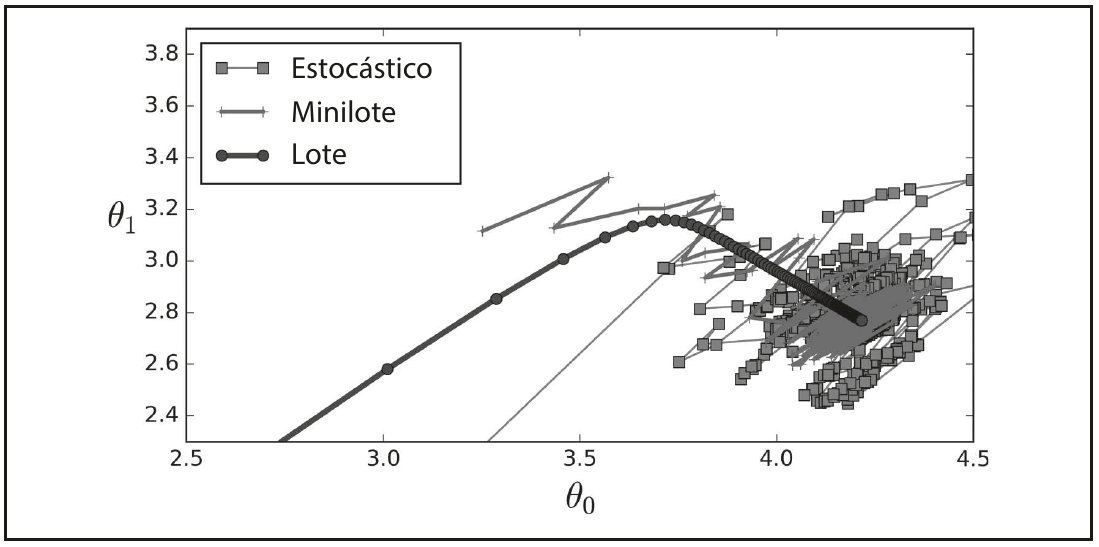

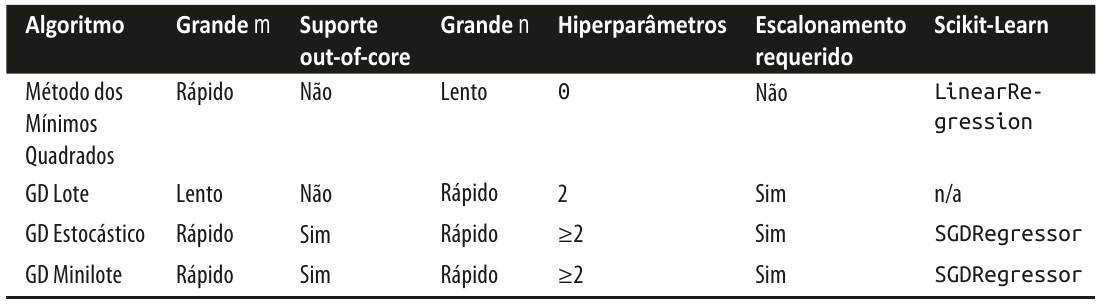



## Polinomial Regression model

So far we have been working with very simple prediction models: lines, but what if the model were something like the one described below?

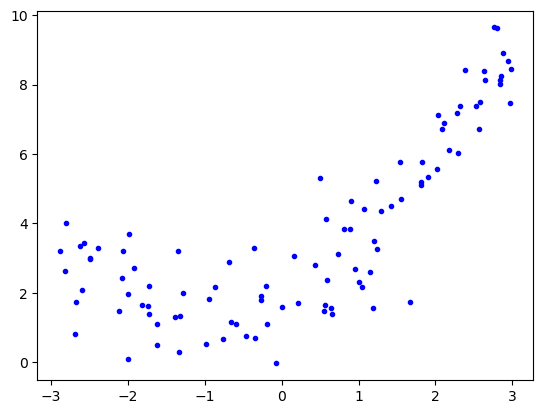

In [13]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y, 'b.')
plt.show()

This model describes a curve, linear regression for this type of problem is completely inaccurate, forcing us to think of another type of solution.
training data by adding the square (2nd degree polynomial) of each feature to the
as new in the training set:

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

print(X[0], '\n\n', X_poly[0])

[2.94407494] 

 [2.94407494 8.66757727]


```X_poly``` now contains the original feature of ```X``` plus the square of this feature.
Now, you can fit a ```LinearRegression``` model to this extended
training data

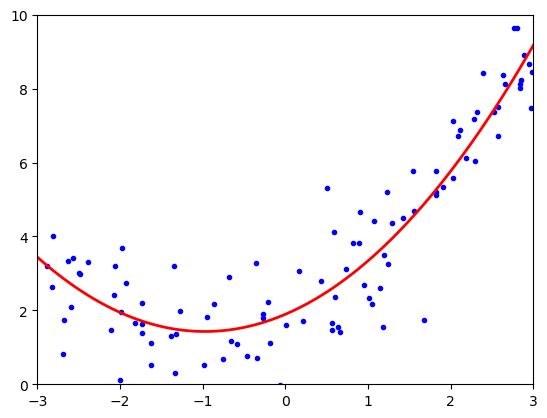

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2)

plt.axis([-3, 3, 0, 10])
plt.show()

Note that when there are several characteristics, Polynomial Regression is able
find relationships among them (something that a simple Linear Regression model cannot do).
model cannot do). This is possible because PolynomialFeatures also adds all the
combinations of features up to the given degree. For example, if there were two Polynomial
nomialFeatures, a and b, with degree=3, they would not only add the
the features a$^{2}$ , a$^{3}$ , b$^{2}$ , and 
b$^{3}$ , but also the combinations ab, a$^{2}$ b and ab$^{2}$ .

### Learning Curve

When you perform High-Grade Polynomial Regression, you will probably accommodate the
the training data much better than with simple Linear Regression. In the figure below we compare a polynomial regression of degree 1, degree 2 and degree 300:

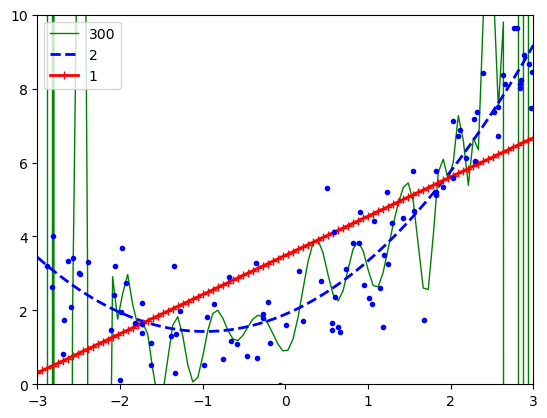

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),])
        
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

Notice how the 300 degree polynomial model moves to
as close as possible to the training instances.
Naturally, this High Degree Polynomial Regression model is overfitting the training data excessively, while the linear model is underfitting it.
model is underfitting it. The model that will generalize best in this case is the quadratic model
This makes sense because the data was generated using a quadratic model, but in general you will not know which function generated the data.

Another way would be to look at the *learning curves*: these are plots of the performance
of the model on the training set and on the validation set as a function
of the training set size (or the training iteration). To generate the
the model several times on subsets of different sizes on the training set.
on the training set. The following code defines a function that plots the learning curves
for some training data on a given model:

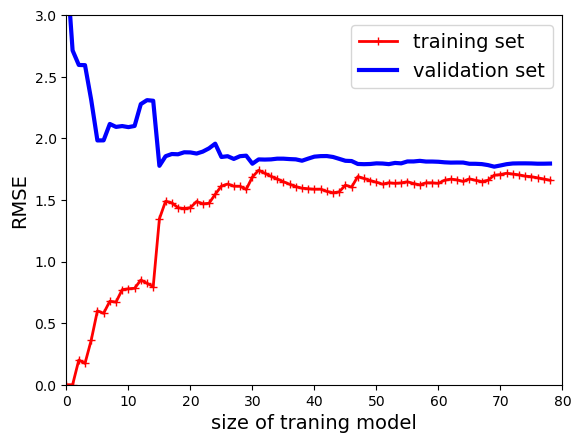

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("size of traning model", fontsize=14)       
    plt.ylabel("RMSE", fontsize=14)

    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()       

This deserves an explanation. First, let's look at the performance on training data:
When there are only one or two instances in the training set, the model fits
perfectly, which is why the curve starts at zero. 

But as we add new
instances, it becomes impossible for the model to fit perfectly, either because it is
either because it's noisy data or because it's not linear data. So this error will go up until it reaches a plateau, a time when adding
plateau, a time when adding new instances to the training set will not make the
make the average error much better or worse. Now let's look at the model's performance on the
validation data.

 When the model is trained on few training instances
it is unable to generalize adequately and this is why the validation error is initially quite large.
validation error is initially quite large. Then, as we present more training instances
the model learns, and so the validation error slowly decreases. However, once again once again, a straight line cannot do a good job of modeling the data, so the error ends up on a plateau very close to the other curve.

>> If your model is underfitting the training data, there is no point in adding more training examples.
will do no good by adding more training examples. You either need to
use a more complex model or get better features.

Now, let's see how a polinomial model of 10nd degree behavior:

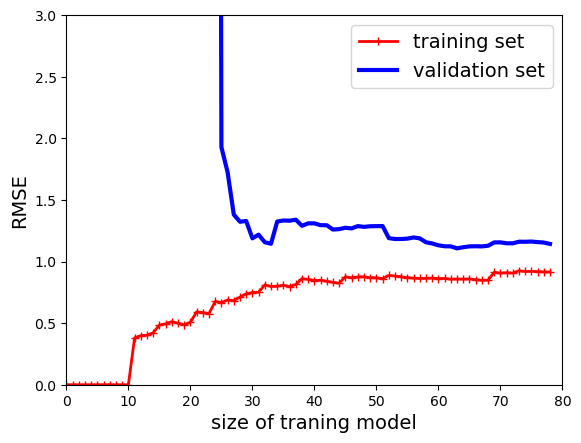

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()  

>> One way to improve an overfitting model is to feed it
with more training data until the validation error reaches the training error.
training error.

An important theoretical result from statistics and Machine Learning is the fact that the generalization error of a model can be expressed as the sum of three very different errors:

*Viés*

This part of the generalization error is due to faulty assumptions, such as assuming that the
linear when in fact they are quadratic. A model with high bias
model is likely to under-fit the training data.

*Variance*

This part is due to the oversensitivity of the model to small variations in the training data.
This part is due to the excessive sensitivity of the model to small variations in training data. A model with many degrees of freedom (such as a high degree
A model with many degrees of freedom (such as a high degree polynomial model) is likely to have a high variance and therefore over-fit the training data.
just the training data.

*Irreducible Error*

This part is due to noise in the data itself. The only way to reduce this part
part of the error is to clean the data (for example, to correct data sources, such as broken sensors, or to detect and remove
broken sensors, or detecting and removing outliers).


>> Increasing the complexity of a model will generally increase its variance and reduce its bias.
its bias. Conversely, reducing the complexity of a model increases its bias and reduces its variance.
variance. This is why it is called compensation.

## Regularized Linear Regression

### Ridge Regression

The *Ridge regression*, also called *Tikhonov regulation*, is a regularizated version of linear regression: a regularization term equal to $\alpha \sum_{i = 1}^{n} \theta_{i}^{2}$ it's additioned to cost function. This forces the learning algorithm not only adapt the data, but keep the model weights as small as possible too.
Once that the model are trained, we have to evalute him.

>> It is quite common that the cost function used during training is different from the performance measure used for
testing. Besides regularization, another reason why they may be
different is that a good training cost function should have derivatives that
derivatives that accept optimization well, while the performance measure used for performance measure used for testing should be as close as possible to the
the end goal. A good example of this is a classifier trained
with a cost function, such as log loss (will be discussed shortly),
but evaluated using precision/revocation.

The hyperparameter α controls how much you want to regularize the model. If $\alpha$ = 0, then
Ridge Regression is just a Linear Regression. If α is too large, then all weights will end up close to zero and the result will be a flat line that passes through the
average of the data.

$$
J(\theta) = MSE(\theta) + \alpha \frac{1}{2}  \sum_{i = 1}^{n} \theta_{i}^{2}
$$

>> It is important to scale the data (for example, using a
StandardScaler) before running Ridge Regression, as it
is sensitive to the scale of the input features. This is true for most
most regularized models.

As with Linear Regression, we can perform Ridge Regression
Regression by means of a closed-form equation or by the Gradient Descent. The pros and
cons are the same.

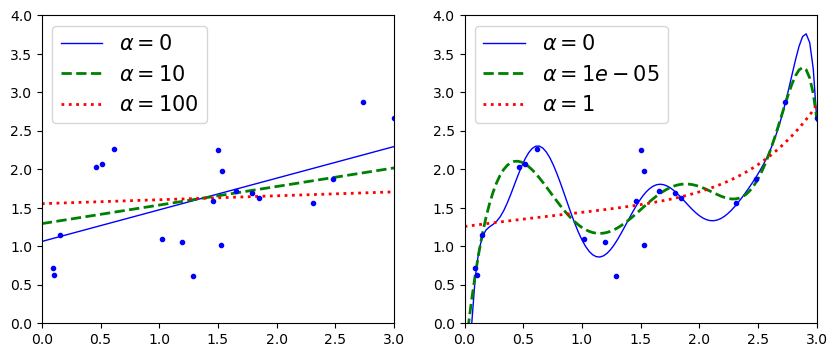

In [19]:
from sklearn.linear_model import Ridge

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        
        if polynomial:
            
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model), ])
            
               
        model.fit(X, y)
        
        y_new_regul = model.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10,4))
plt.subplot(121)

plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.subplot(122)

plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

Solution in the close Ridge regression:

$$
\hat \theta = (\mathbf{X}^{T} \cdot \mathbf{X} + \alpha \mathbf{A})^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

### Lasso Regression

Lasso is a acronym for *Least Absolute Shrinkage and Selection Operation*.

Lasso Regression is another Regularizated Linear Regression, similar to Ridge Regression, Lasso Regression add a regularization term to cost function, but utilizes a norm of l$_{1}$ wheight vector insted the half of square of l${2}$ norm.

$$
J(\theta) = MSE(\theta) + \alpha \sum_{i = 1}^{n} |\theta_{i}|
$$

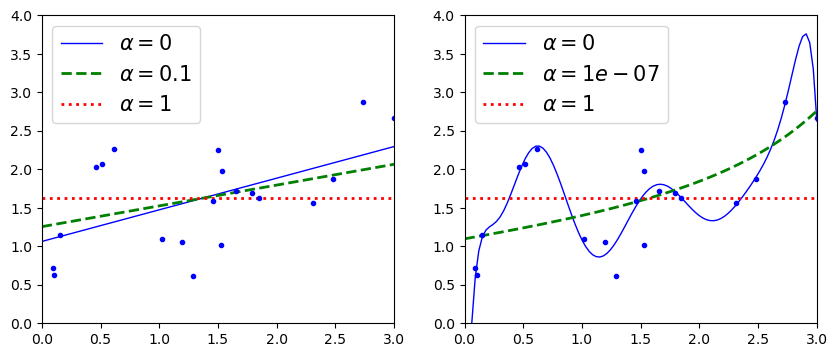

In [20]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))

plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

>> An important feature of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e. set them to zero).

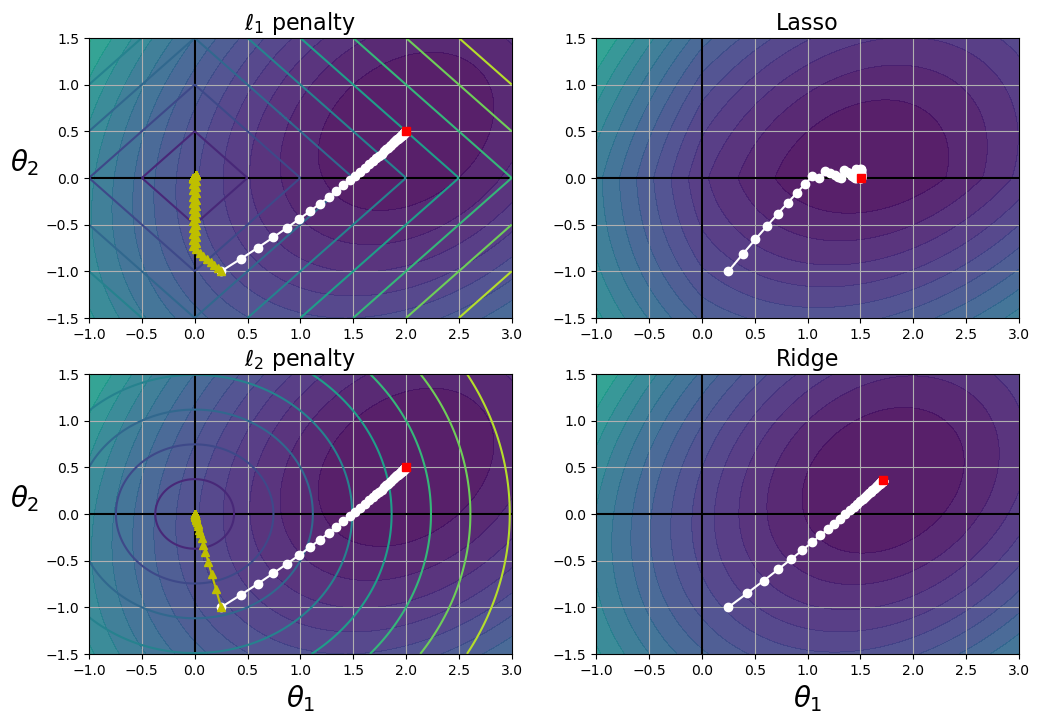

In [21]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)

t1, t2 = np.meshgrid(t1s, t2s)

T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))

for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0, labelpad=15)
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1: plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

 In the plot above, the background contours (ellipses) represent an unregulated MSE cost function
regulated ($\alpha$ = 0) cost function, and the white circle shows the BGD path with that cost function. The foreground contours (diamonds) represent the l$_{1}$ penalty, and the triangles show the BGD path only for
this penalty (α → ∞).

Notice how the path first reaches $theta_{1}$ = 0, then rolls down a trough until it reaches $theta_{2}$ = 0. In the upper right plot, the contours represent the same cost function plus a penalty of l$_{1}$ with $\alpha$ = 0.5. The global minimum is on the $\theta_{2}$ = 0 axis. The BGD first reaches $\theta_{2}$ = 0, then rolls the trough until it reaches the global minimum. The two bottom plots show the same, but use a penalty
l$_{2}$ instead. The regularized minimum is closer to $\theta$ = 0 than the
unregulated, but the weights are not completely eliminated.

 >> In the Lasso cost function, the BGD path tends to jump through the loop to the end.
tion towards the end. This is because the slope changes abruptly
to $\theta_{2}$ = 0. You need to gradually reduce the learning rate
to actually converge to the global minimum.


Lasso's cost function is not differentiable at $\theta_{i} = 0$ (for i = 1,2, ..., n) but the Descendent Gradient still works well if you use a *subgradient vector* **g** when any $\theta_{i}$ is equal to 0, the next equation shows a subgradient vector equation that can be used for the Descendent Gradient with Lasso's cost function.

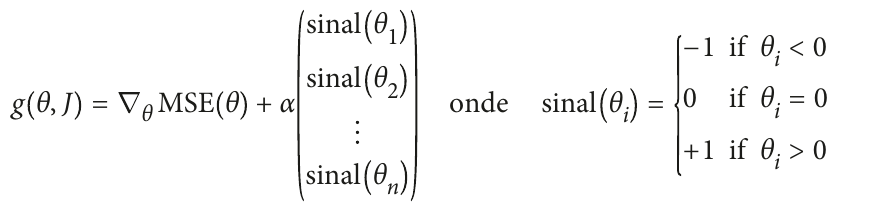

Here is an example of using the Lasso class using Scikit-Learn:

In [22]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.65986316])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mixture of the Ridge and Lasso regularization terms, and you can control the mixing ratio r. When r = 0, the Elastic Net is equivalent to the Ridge Regression, and when  r = 1, it is equivalent to the Lasso Regression

Here the cost function of Elastic Net:

$$
J(\theta) = MSE(\theta) + r \alpha \sum_{i = 1}^{n} |\theta_{i}| + \frac{1 - r}{2} \alpha \sum_{i = 1}^{n} \theta_{i}^{2}
$$

> So, when to use a simple Linear Regression (for example, without any re gularization), Ridge, Lasso or Elastic Net? It is almost always preferable to have at least a
regularization, so generally you should avoid a simple Linear Regression.
Ridge is a good default, but if you suspect that only a few features are
useful, you should prefer Lasso or Elastic Net, as they tend to reduce the weights of useless
the weights of useless features to zero, as discussed. Overall, Elastic Net is preferred over Lasso
because it may behave erratically when the number of features is larger than the number of
than the number of training instances or when several features are strongly correlated.
features are strongly correlated.

In [23]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.66639839])

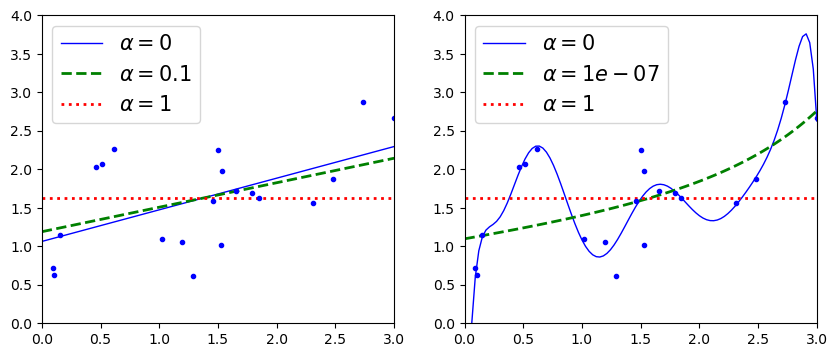

In [24]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plot_model(ElasticNet, polynomial=False, alphas=(0, 0.1, 1), random_state=42)

plt.subplot(122)
plot_model(ElasticNet, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

### Early Stop

A very different way to regularize iterative learning algorithms like
Descending Gradients is to stop training as soon as the validation error reaches a minimum.
reaches a minimum. This is called *early stop*.

As epochs occur, the algorithm learns and its prediction error (RMSE) on the training set naturally decays, as does its prediction error on the validation set. 

However,
However, after a while, the validation error stops decaying and starts to rise, indicating that the
model has started overfitting the training data. With early stopping
you stop training as soon as the validation error reaches the minimum.

/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/a

/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/a

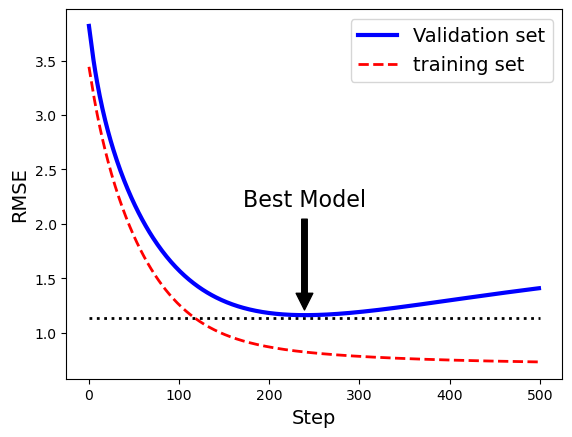

In [25]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),])
    

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):

    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best Model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Step", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

>> With EGD and MBGD, the curves
curves are not as smooth, and it can be difficult to know if you have reached the minimum
or not. One solution would be to stop only after the validation error
above the minimum for a period (when you are sure that the model
model doesn't get any better), then roll back your parameters to the point
to the point where the validation error was at its minimum.

In [26]:
# Code example:

from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/a

/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/a

/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/BPalhano/a

### Logistic Regression

also called as Logit Regression, is commonly used to estimate the probability that an instance belongs to a certain class (e.g. what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class. This makes it a binary classifier.

#### Estimating probabilities

Like a Linear Regression model, a Logistic Regression model
Logistic Regression model computes a weighted sum of the input characteristics (plus
a bias term), but instead of generating the result directly like the Linear Regression model
model, it generates the logistic of that result.

$$
\hat p = h_{\theta}(\mathbf{x}) = \sigma(\theta^{T} \cdot \mathbf{x})
$$

the logistic ($\sigma(\cdot)$) is a *sigmoid function* (has a "S-shape"):

$$
\sigma(t) = \frac{1}{1 + exp (-t)}
$$

$$
\hat{y} = \begin{cases} 0 \quad \hat{p} < 0.5 \\ 1 \quad \hat{p} \ge 0.5 \end{cases}
$$

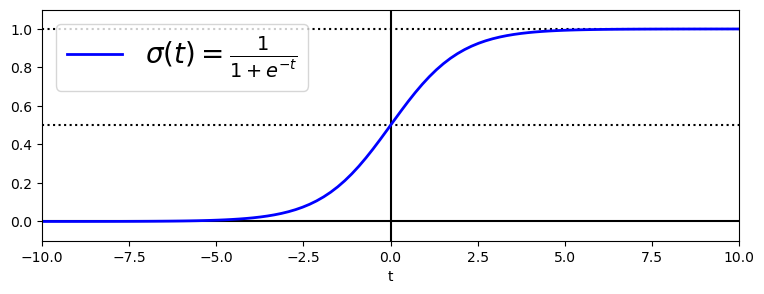

In [27]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))

plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")

plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")

plt.legend(loc="upper left", fontsize=20)

plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Since the Logistic Regression model has estimated the probability $\hat p = h_{\theta} (\mathbf{x})$ that the instance $\textbf{x}$ belongs to the positive class, it can easily make its prediction $\hat y$.

Note that $\sigma$(t) < 0.5 when t < 0, and $\sigma$(t) ≥ 0.5 when t ≥ 0, so a
Logistic Regression model predicts 1 if $\theta^{T}$ - x is positive, and 0 if it is negative.

#### Training and cost function

The goal of training is to define the vector of the
parameter $\theta$ so that the model estimates high probabilities for positive instances (y
= 1) and low probabilities for negative instances (y = 0). Here the cost function for a unique traning instance:

$$
c(\theta) = \begin{cases} -\log{\left( \hat{p} \right)} \quad     \text{if, }y=1 \\ -\log{\left(1-\hat{p}\right)} \quad \text{if, }y = 0 \end{cases}
$$

This cost function makes sense because - log(t) increases greatly when t approaches 0,
so the cost will be higher if the model estimates a probability close to 0 for a positive
positive instance, and it will also be much higher if the model estimates a probability close to 1 for a negative instance.
close to 1 for a negative instance. On the other hand, - log(t) is close to 0 when
t is close to 1, then the cost will be close to 0 if the estimated probability is close to 0 for a negative
close to 0 for a negative instance or close to 1 for a positive instance,
which is exactly what we want.

The cost function over the entire training set is simply the average cost
The cost function over the entire training set is simply the average cost over all training instances. It can be written in a simple
simple expression (as you can easily check), called *log loss*:

$$
J(\mathbf{\theta}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}
$$

The bad news is that there is no known closed-form equation for calculating the value of
value that minimizes this cost function (there is no equivalent of the Least Squares Squares Method equivalent). But the good news is that this cost function is convex, so the Gradient
(or any other optimization algorithm) makes sure to find the global minimum
the global minimum (if the learning rate is not too high and you wait long enough).
long enough). Here the gradient of cost function:


$$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

Here a example of logistic regression using ```Iris_dataset``` from ```Scikit-Learn Database```:

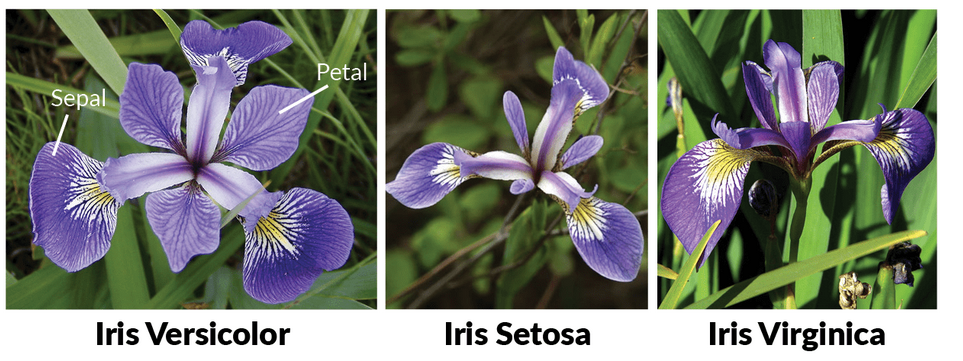

In [28]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
import pandas as pd

iris_df = pd.DataFrame(iris['data'], columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
# Slicing the dataset:
X = iris['data'][:, 3:] # petal lenght
y = (iris['target'] == 2).astype(np.int) # 1 if is Iris Virgínica, 0 if not. 

/tmp/ipykernel_44757/772487792.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int) # 1 if is Iris Virgínica, 0 if not.


In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

/home/BPalhano/anaconda3/lib/python3.9/site-packages/matplotlib/patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


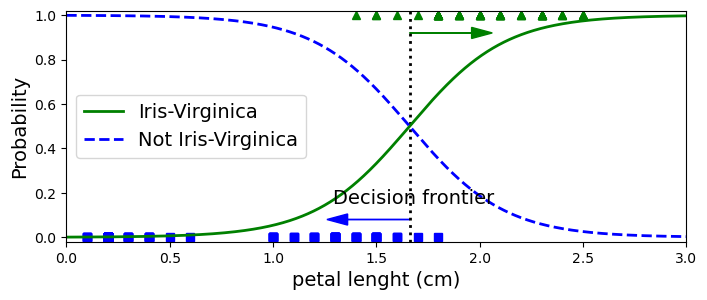

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision frontier", fontsize=14, color="k", ha="center")

plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("petal lenght (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

Here we load the ```Iris Dataset``` and extract the petal lenght feature to binary classifier if a instance is a Iris-Virginica or not is this one. Let's do again a experiment with same dataset, but now showing two features: petal lenght and width.

The dashed line represents the points where the model estimates
a 50% probability: this is the model's decision frontier. Note that it is a
linear frontier (i.e. the set of points x such that $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$ defines a straight line). 
Each parallel line represents the points where the model yields a specific probability, from 15% (bottom left) to 90% (top right). All flowers beyond the upper right line have more than a 90% chance of being Iris-Virginica, according to the model.

/tmp/ipykernel_44757/2254372127.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


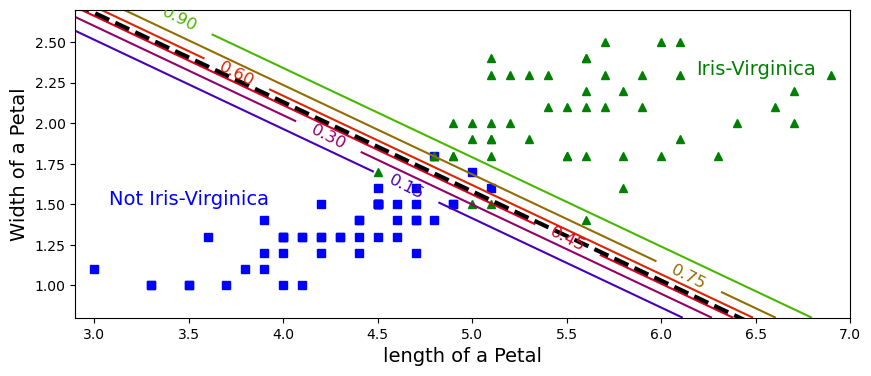

In [34]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)

log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))

plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)

plt.plot(left_right, boundary, "k--", linewidth=3)

plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")

plt.xlabel("length of a Petal", fontsize=14)
plt.ylabel("Width of a Petal", fontsize=14)

plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

>> The hyperparameter that controls the regularization strength of a Scikit-Learn
LogisticRegression model of the Scikit-Learn is not alpha (as in other linear
other linear models), but its inverse: C. The higher the value
value of C, the less the model is regularized.

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes
classes directly without the need to train and combine multiple binary classifiers.  This is called *Softmax Regression*, or *Multinomial Logistic Regression*.

The idea is quite simple: when given an instance $\textbf{x}$, the Softmax Regression model
first computes a score $s_k(\mathbf{x})$ for each class k, then estimates the probability
of each class by applying the *softmax function* (also called *normalized exponential*) to the scores.
to the scores.

$$
S_k \left( \mathbf{x} \right) = \left( \theta_{k} \right)^{T} \cdot \mathbf{x}
$$

Once we have calculated the score of each class for the $\textbf{x}$ instance, we can estimate the probability $\hat p_k$ of the intancia belonging to class k by running the scores through the softmax function:

$$
\hat{p}_k = \sigma \left( s(\mathbf{x}) \right)_k = \frac{ \text{exp} \left( S_k(\mathbf{x}) \right)}{\sum_{j=1}^{K}{\text{exp} \left( S_j (\mathbf{x}) \right)}}
$$

Where K is the number of classes, $\mathbf{s(x)}$ is a vector that contains the class points for $\mathbf{x}$ instance and $\sigma(\mathbf{s(x)})$ is the estimated probability that instance $\mathbf{x}$ belongs to class k given the scores of each class for that instance.

>> The Softmax Regression classifier predicts only one class at
class at a time (that is, it is multi-class, not multi-output), so it should
only be used with mutually exclusive classes, such as different plant
different types of plants. You cannot use it to recognize multiple
people in a single image.

For this model, we wil use the cross-entropy as a validation metric for the training:

> Cross entropy originated in information theory. Suppose you want to trans- port weather
transmit weather information efficiently every day. If there are eight options
(sunny, rainy, etc.), you could program each option using 3 bits since 23 = 8.
However, if you think it will be sunny almost every day, it would be much more efficient to
more efficient to program "sunny" with just one bit (0) and the other seven options with
4 bits (starting with 1). The cross entropy measures the average number of bits per option
that you actually send. If your assumption is perfect, the cross entropy is only
If your assumption is perfect, the cross entropy is only equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if
your assumptions are wrong (for example, if it rains frequently), the cross entropy
will be better by a quantity called the Kullback-Leibler divergence.

Here the cost function for cross-entropy:

$$
J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m}{\sum_{k=1}^{K}{y_k^{(i)} \log{\left( \hat{p}_k^{(i)} \right)}}}
$$

and here the gradient of cost function:

$$
\nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m}{\left( \hat{p}_k^{(i)} - y_k^{(i)} \right)\mathbf{x}^{(i)}}
$$

Now you can calculate the gradient vector for each class and then use
the Descending Gradient (or any other optimization algorithm) to find
the parameter matrix $\Theta$ that minimizes the cost function.

In [35]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

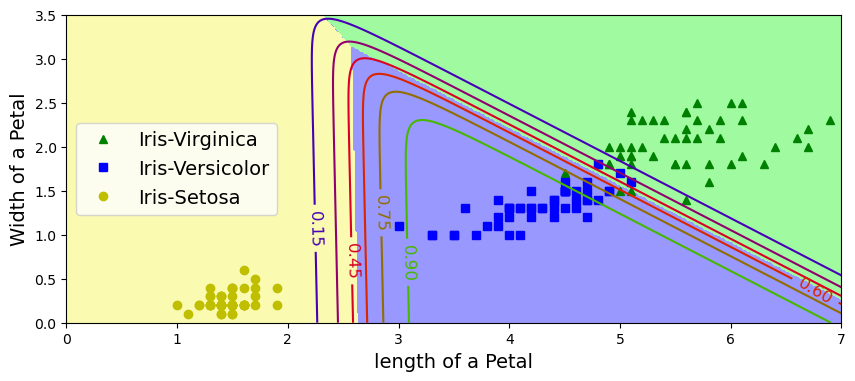

In [36]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)

contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)

plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("length of a Petal", fontsize=14)
plt.ylabel("Width of a Petal", fontsize=14)

plt.legend(loc="center left", fontsize=14)

plt.axis([0, 7, 0, 3.5])
plt.show()